In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName('Knowledge Graph Visualization') \
    .master('spark://columbus-oh.cs.colostate.edu:30800') \
    .config("spark.yarn.resourcemanager.address", "columbia.cs.colostate.edu:30799") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/19 15:13:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
hdfs_path =  "hdfs://columbus-oh.cs.colostate.edu:30785/geospatial/graph/base_graph.csv"

# Read the CSV file
df = spark.read.csv(hdfs_path, header=True, inferSchema=True)

# Convert to Pandas DataFrame for easier manipulation when building the graph
pdf = df.toPandas()

In [4]:
df.count()

330526

In [5]:
# Initialize a directed graph
G = nx.DiGraph()

# Add edges from DataFrame
for idx, row in pdf.iterrows():
    G.add_edge(row['Subject'], row['Object'], relationship=row['Relationship'])


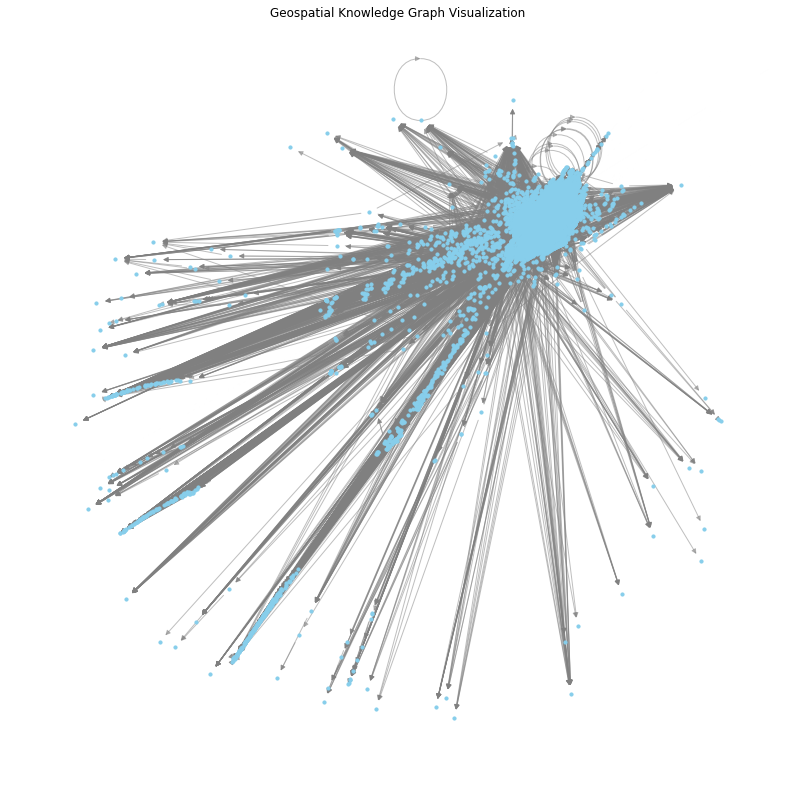

24/04/19 16:07:59 ERROR StandaloneSchedulerBackend: Application has been killed. Reason: Master removed our application: KILLED
24/04/19 16:07:59 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exiting due to error from cluster scheduler: Master removed our application: KILLED
	at org.apache.spark.errors.SparkCoreErrors$.clusterSchedulerError(SparkCoreErrors.scala:291)
	at org.apache.spark.scheduler.TaskSchedulerImpl.error(TaskSchedulerImpl.scala:981)
	at org.apache.spark.scheduler.cluster.StandaloneSchedulerBackend.dead(StandaloneSchedulerBackend.scala:165)
	at org.apache.spark.deploy.client.StandaloneAppClient$ClientEndpoint.markDead(StandaloneAppClient.scala:263)
	at org.apache.spark.deploy.client.StandaloneAppClient$ClientEndpoint$$anonfun$receive$1.applyOrElse(StandaloneAppClient.scala:170)
	at org.apache.spark.rpc.netty.Inbox.$anonfun$process$1(Inbox.scala:115)
	at org.apache.spark.rpc.netty.Inbox.safelyCall(Inbox.scala:213)
	at org.apache.spark.rpc.netty.Inbox.proce

In [6]:
# Drawing the graph
pos = nx.spring_layout(G)  # positions for all nodes
plt.figure(figsize=(14, 14))  # size of the plot

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='skyblue', alpha=1)

# Edges
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color='gray')

# Labels
# nx.draw_networkx_labels(G, pos, font_color='grey', font_size=12, font_family='sans-serif')

plt.title('Geospatial Knowledge Graph Visualization')
plt.axis('off')  # turn off the axis
plt.show()